In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


In [4]:
def y2indicator(y):
    N = len(y)
    K = len(set(y))
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind


def getData(balance_ones=True):
    # images are 48x48 size vectors
    Y = []
    X = []
    first = True
    for line in open('../fer2013/fer2013.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)

    if balance_ones:
        # balance the 1 class
        X0, Y0 = X[Y!=1, :], Y[Y!=1]
        X1 = X[Y==1, :]
        X1 = np.repeat(X1, 9, axis=0)
        X = np.vstack([X0, X1])
        Y = np.concatenate((Y0, [1]*len(X1)))
    X, Y = shuffle(X, Y, random_state = 596)
    return X, Y

In [5]:
from sklearn.utils import shuffle

X, Y = getData()
X = X.astype(np.float32)
X = X.astype(np.float32)
Y = y2indicator(Y).astype(np.float32)



In [6]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [7]:
Xtest, Ytest = X[:4000,], Y[:4000,]


X, Y = X[4000:,], Y[4000:,]

Ytest_flat = np.argmax(Ytest, axis=1) # for calculating error rate
VALIDATION_SIZE = 2000

validation_images = X[:VALIDATION_SIZE]
validation_labels = Y[:VALIDATION_SIZE]

train_images = X[VALIDATION_SIZE:]
train_labels = Y[VALIDATION_SIZE:]

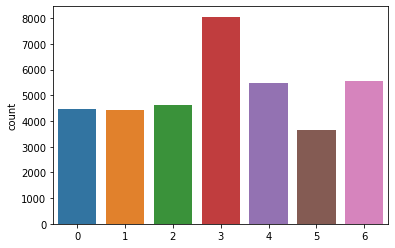

In [8]:
Ytrain_flat = np.argmax(Y, axis = 1)

sns.countplot(Ytrain_flat)

In [9]:
len(Y)

36263

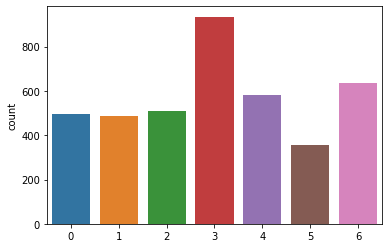

In [10]:
import seaborn as sns
sns.countplot(Ytest_flat)

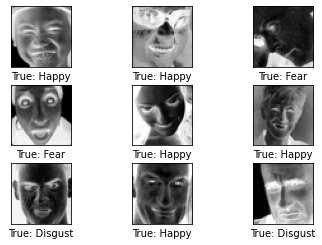

In [11]:
img_size = 48
img_shape = (img_size, img_size)



label = ['Anger','Disgust','Fear','Happy','Sad','Surprise','Neutral']

# Get the first images from the test-set.
images = X[0:9]

# Get the true classes for those images.
# cls_true = Y[0:9]
cls_true = []
for x in Y[0:9]:
    cls_true.append(label[np.argmax(x)])
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [26]:
from sklearn.model_selection import ShuffleSplit

from sklearn.neural_network import MLPClassifier

NN_clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1024, ),
                        activation='tanh', random_state=1)
num_Iter = 10

# 2. Cross Vaidation: Three folds with test size(20%)

ss1 = ShuffleSplit(n_splits=2, test_size=0.2, random_state = 12345)
train_predict = []
test_predict = []

# Save Real Test/Train Sentiment (Neutral/Non_Neutral)
Y_test_act2 = []
Y_train_act2 = []

# Save Test/Train prediction
test_prediction2 = []
train_prediction2 = []

# Save Train/Test index
neutral_train_index = [] 
neutral_test_index = []


num = 0

for train_index, test_index in ss1.split(X):
    
    print("TRAIN:", train_index, "TEST:", test_index)
    
    neutral_train_index.append(train_index)
    neutral_test_index.append(test_index)
    
    # Split Test/Train X and Y
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Ytrain_flat[train_index], Ytrain_flat[test_index]
   
    # Warining: Don't change to matrix for logistic regression
    X_train = X_train
    X_test = X_test
    
    # Fit the Model
    NN_clf2.fit(X_train, Y_train)
    
    # Apply the model to test set & train set
    test_prediction2.append(NN_clf2.predict(X_test))
    Y_test_act2.append(Y_test)   
    
    train_prediction2.append(NN_clf2.predict(X_train))
    Y_train_act2.append(Y_train)
    
    train_predict.append(NN_clf2.predict(X))
    test_predict.append(NN_clf2.predict(Xtest))  

TRAIN: [35974 27392 17612 ...  2177 11749 20962] TEST: [ 9371 10690 34058 ... 24323 23471 13743]


/Users/wonhyukjang/opt/anaconda3/envs/twitter/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



TRAIN: [16558 33669 22994 ... 10928 35381  7513] TEST: [ 1578 20750 30718 ... 12862 25534 12158]


/Users/wonhyukjang/opt/anaconda3/envs/twitter/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [29]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


NN_accuracy_test_score = []
for y, x in zip(Y_test_act2, test_prediction2):
    print(confusion_matrix(y, x))
    print('\n')
    print(classification_report(y, x, digits = 6))
    print (len(Y_test))
    print(accuracy_score(y, x))
    NN_accuracy_test_score.append(accuracy_score(y, x))


[[ 180   77   92  245  142   65  125]
 [  34  656   41   42   25   13   43]
 [  93   51  171  223  173  109  134]
 [ 107   64  101 1022  126   64  162]
 [  96   55  111  248  277   54  206]
 [  35   34   83  110   50  335   71]
 [  91   69   91  245  162   70  380]]


              precision    recall  f1-score   support

           0   0.283019  0.194384  0.230474       926
           1   0.652087  0.768150  0.705376       854
           2   0.247826  0.179245  0.208029       954
           3   0.478689  0.620899  0.540598      1646
           4   0.290052  0.264565  0.276723      1047
           5   0.471831  0.466574  0.469188       718
           6   0.338983  0.342960  0.340960      1108

    accuracy                       0.416517      7253
   macro avg   0.394641  0.405254  0.395907      7253
weighted avg   0.394507  0.416517  0.401004      7253

7253
0.416517303184889
[[ 159   70   88  276  138   61  125]
 [  24  629   35   81   54   23   41]
 [  75   62  154  247  135  123  11

In [30]:
NN_accuracy_train_score = []
for y, x in zip(Y_train_act2, train_prediction2):
    print(confusion_matrix(y, x))
    print('\n')
    print(classification_report(y, x, digits = 6))
    print (len(Y_train))
    print(accuracy_score(y, x))
    NN_accuracy_train_score.append(accuracy_score(y, x))

[[ 937  253  291  840  518  220  473]
 [  94 2905  122  182   88   59  132]
 [ 276  237  989  740  566  408  442]
 [ 277  244  257 4444  517  215  454]
 [ 359  260  397  944 1590  190  707]
 [ 129  127  245  406  172 1590  259]
 [ 306  214  323 1003  553  220 1836]]


              precision    recall  f1-score   support

           0   0.394029  0.265289  0.317090      3532
           1   0.685142  0.810999  0.742777      3582
           2   0.376905  0.270366  0.314868      3658
           3   0.519220  0.693508  0.593840      6408
           4   0.397103  0.357544  0.376287      4447
           5   0.547898  0.543033  0.545455      2928
           6   0.426679  0.412121  0.419274      4455

    accuracy                       0.492623     29010
   macro avg   0.478139  0.478980  0.472798     29010
weighted avg   0.476483  0.492623  0.478318     29010

29010
0.4926232333678042
[[ 857  261  273  957  493  214  486]
 [  74 2857   92  250  120   50  106]
 [ 267  236  894  839  543  448  

In [31]:
best_test_arg = np.argmax(NN_accuracy_test_score)

In [32]:
df_train = pd.DataFrame(train_predict[best_test_arg])
df_test = pd.DataFrame(test_predict[best_test_arg])

In [33]:
df_train.to_csv("NN_Train3.csv")
df_test.to_csv("NN_Test3.csv")



In [34]:
print(confusion_matrix(Ytest_flat, test_predict[best_test_arg]))
print('\n')
print(classification_report(Ytest_flat, test_predict[best_test_arg], digits = 6))
print(accuracy_score(Ytest_flat, test_predict[best_test_arg]))
NN_accuracy_test_score.append(accuracy_score(Ytest_flat, test_predict[best_test_arg]))

[[ 75  32  45 162  72  28  81]
 [ 10 375  17  29  15   8  33]
 [ 43  35  84 123  85  68  71]
 [ 49  36  40 580  81  50  99]
 [ 54  36  52 152 155  24 110]
 [ 10  15  35  53  21 179  43]
 [ 41  38  45 187  89  33 202]]


              precision    recall  f1-score   support

           0   0.265957  0.151515  0.193050       495
           1   0.661376  0.770021  0.711575       487
           2   0.264151  0.165029  0.203144       509
           3   0.451011  0.620321  0.522287       935
           4   0.299228  0.265866  0.281562       583
           5   0.458974  0.502809  0.479893       356
           6   0.316119  0.318110  0.317111       635

    accuracy                       0.412500      4000
   macro avg   0.388117  0.399096  0.386946      4000
weighted avg   0.387117  0.412500  0.392549      4000

0.4125


In [37]:
from sklearn.metrics import precision_recall_fscore_support
clf_rep = precision_recall_fscore_support(Ytest_flat, test_predict[best_test_arg])
out_dict = {
             "precision" :clf_rep[0].round(2)
            ,"recall" : clf_rep[1].round(2)
            ,"f1-score" : clf_rep[2].round(2)
            ,"support" : clf_rep[3]
            }
out_df = pd.DataFrame(out_dict, index = [0,1,2,3,4,5,6])
avg_tot = (out_df.apply(lambda x: round(x.mean(), 2) if x.name!="support" else  round(x.sum(), 2)).to_frame().T)
avg_tot.index = ["avg/total"]
out_df = out_df.append(avg_tot)
print (out_df)

           precision  recall  f1-score  support
0               0.27    0.15      0.19    495.0
1               0.66    0.77      0.71    487.0
2               0.26    0.17      0.20    509.0
3               0.45    0.62      0.52    935.0
4               0.30    0.27      0.28    583.0
5               0.46    0.50      0.48    356.0
6               0.32    0.32      0.32    635.0
avg/total       0.39    0.40      0.39   4000.0


In [38]:
out_df.to_csv('NN3_Precision.csv')